In [1]:
# Option A: Upload the dataset to the current Colab session
from google.colab import files
uploaded = files.upload()  # upload Human_Resources.csv


Saving Human_Resources.csv to Human_Resources.csv


In [2]:
# Core imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load HR data
# (Make sure the uploaded filename matches exactly: Human_Resources.csv)
hr_data = pd.read_csv('Human_Resources.csv')
hr_data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1.0,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2.0,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4.0,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5.0,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7.0,...,4,80,1,6,3,3,2,2,2,2


## 1) Arabic text support for Matplotlib

Install and configure Arabic reshaping and bidirectional display so that titles/labels render correctly.


In [3]:
!pip -q install arabic-reshaper python-bidi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 23.7 MB/s eta 0:00:00


In [4]:
import arabic_reshaper
from bidi.algorithm import get_display

def fix_arabic_text(text: str) -> str:
    """Reshape and reorder Arabic text for correct rendering in Matplotlib."""
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)


## 2) Histogram — Age distribution


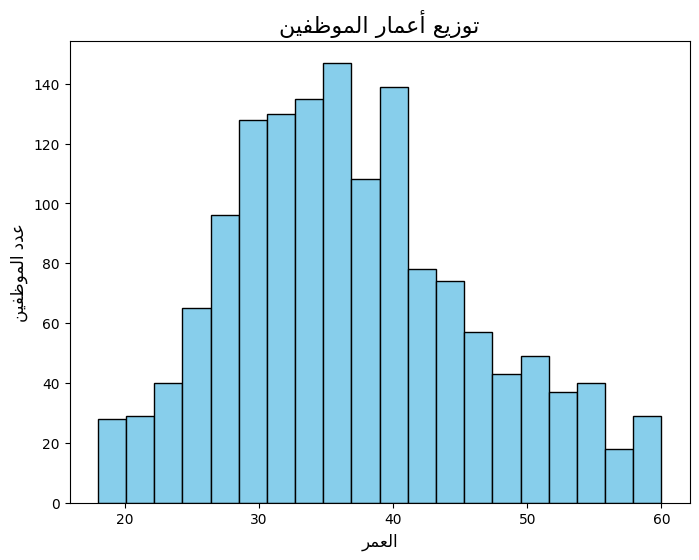

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(hr_data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title(fix_arabic_text('توزيع أعمار الموظفين'), fontsize=16)
plt.xlabel(fix_arabic_text('العمر'), fontsize=12)
plt.ylabel(fix_arabic_text('عدد الموظفين'), fontsize=12)
plt.show()


## 3) Multiple histograms — Monthly income by department


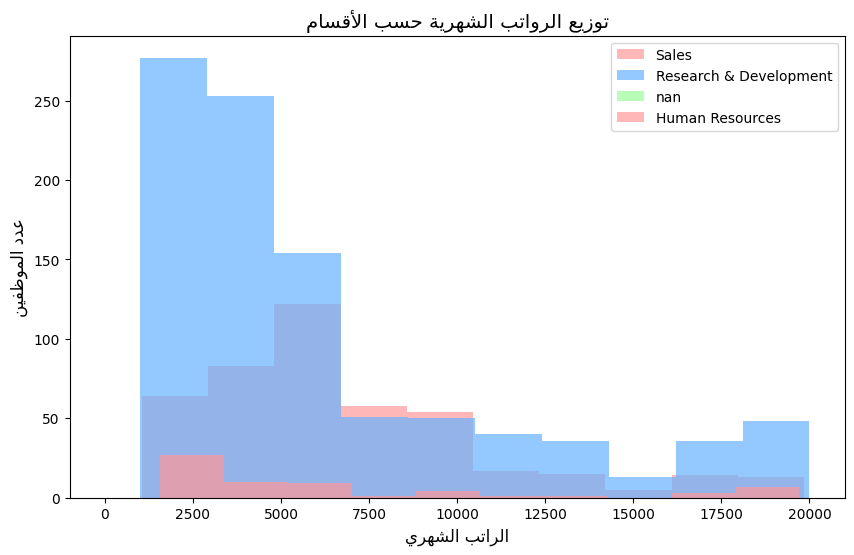

In [6]:
plt.figure(figsize=(10, 6))

departments = hr_data['Department'].unique()
colors = ['#FF9999', '#66B2FF', '#99FF99']

for i, dept in enumerate(departments):
    dept_salaries = hr_data[hr_data['Department'] == dept]['MonthlyIncome']
    plt.hist(dept_salaries, alpha=0.7, label=str(dept), color=colors[i % len(colors)])

plt.title(fix_arabic_text('توزيع الرواتب الشهرية حسب الأقسام'), fontsize=14)
plt.xlabel(fix_arabic_text('الراتب الشهري'), fontsize=12)
plt.ylabel(fix_arabic_text('عدد الموظفين'), fontsize=12)
plt.legend()
plt.show()


## 4) Line chart — Average monthly income by total working years


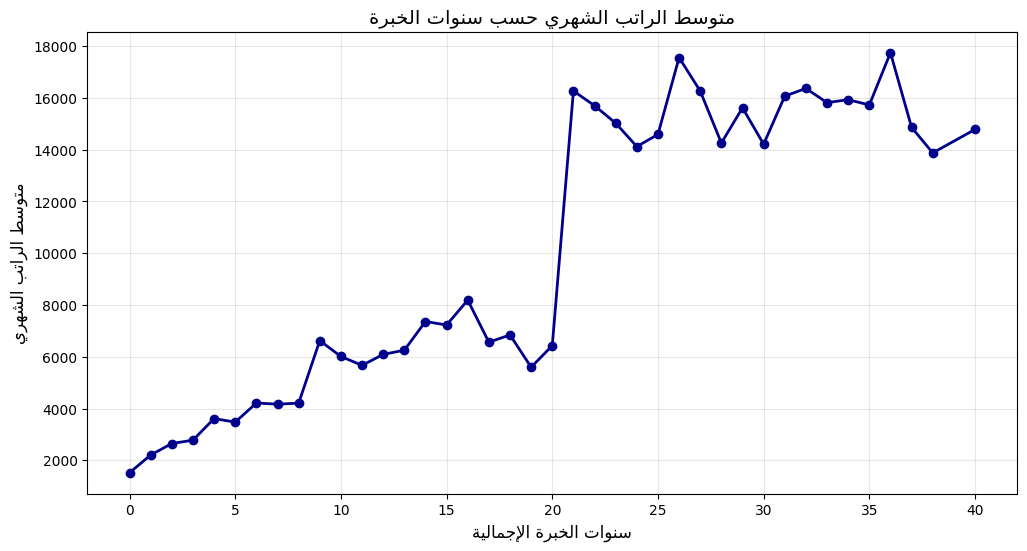

In [7]:
experience_salary = hr_data.groupby('TotalWorkingYears')['MonthlyIncome'].mean()

plt.figure(figsize=(12, 6))
plt.plot(
    experience_salary.index,
    experience_salary.values,
    marker='o',
    linewidth=2,
    markersize=6,
    color='darkblue'
)
plt.title(fix_arabic_text('متوسط الراتب الشهري حسب سنوات الخبرة'), fontsize=14)
plt.xlabel(fix_arabic_text('سنوات الخبرة الإجمالية'), fontsize=12)
plt.ylabel(fix_arabic_text('متوسط الراتب الشهري'), fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


## 5) Line chart — Quarterly hiring performance (synthetic example)


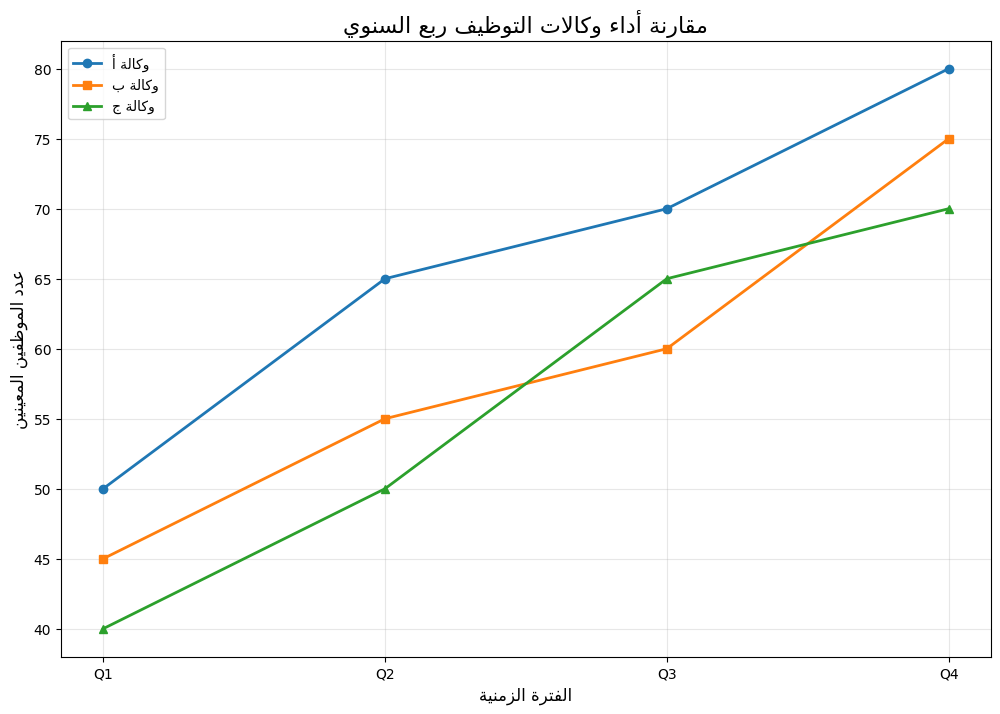

In [8]:
plt.figure(figsize=(12, 8))

agency_names = ['وكالة أ', 'وكالة ب', 'وكالة ج']
agency_names = list(map(fix_arabic_text, agency_names))

quarters = ['Q1', 'Q2', 'Q3', 'Q4']
performance_a = [50, 65, 70, 80]
performance_b = [45, 55, 60, 75]
performance_c = [40, 50, 65, 70]

plt.plot(quarters, performance_a, marker='o', label=fix_arabic_text('وكالة أ'), linewidth=2)
plt.plot(quarters, performance_b, marker='s', label=fix_arabic_text('وكالة ب'), linewidth=2)
plt.plot(quarters, performance_c, marker='^', label=fix_arabic_text('وكالة ج'), linewidth=2)

plt.title(fix_arabic_text('مقارنة أداء وكالات التوظيف ربع السنوي'), fontsize=16)
plt.xlabel(fix_arabic_text('الفترة الزمنية'), fontsize=12)
plt.ylabel(fix_arabic_text('عدد الموظفين المعينين'), fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## 6) Bar chart — Employee counts by department (synthetic example)


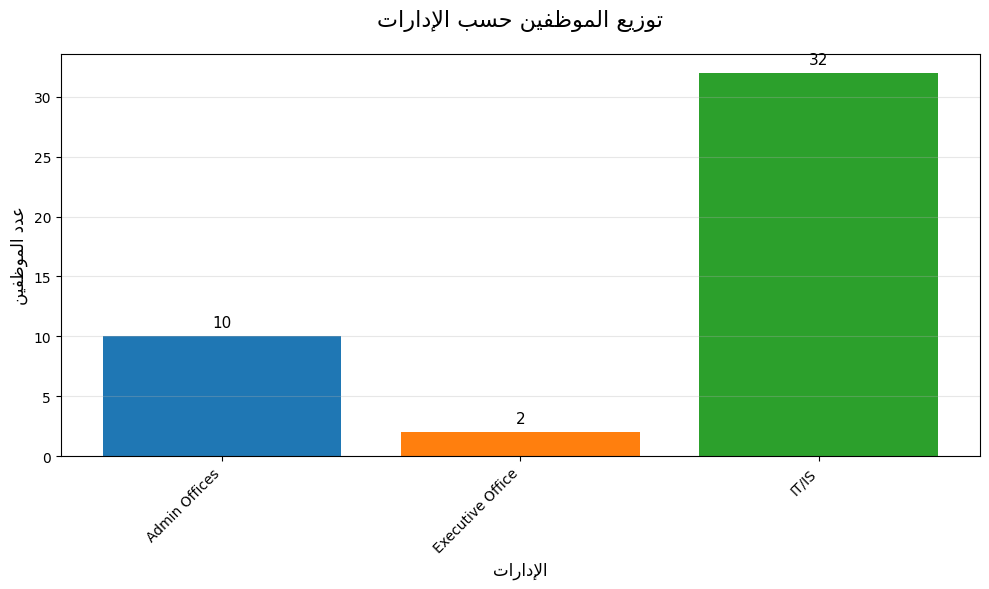

In [9]:
department_names = ['Admin Offices', 'Executive Office', 'IT/IS']
employee_counts = [10, 2, 32]

plt.figure(figsize=(10, 6))
bars = plt.bar(department_names, employee_counts, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

plt.title(fix_arabic_text('توزيع الموظفين حسب الإدارات'), fontsize=16, pad=20)
plt.xlabel(fix_arabic_text('الإدارات'), fontsize=12)
plt.ylabel(fix_arabic_text('عدد الموظفين'), fontsize=12)

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., h + 0.5, f'{int(h)}', ha='center', va='bottom', fontsize=11)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()


## 7) Stacked bar (via pandas) — Attrition rate by overtime + save to PNG


<Figure size 1000x600 with 0 Axes>

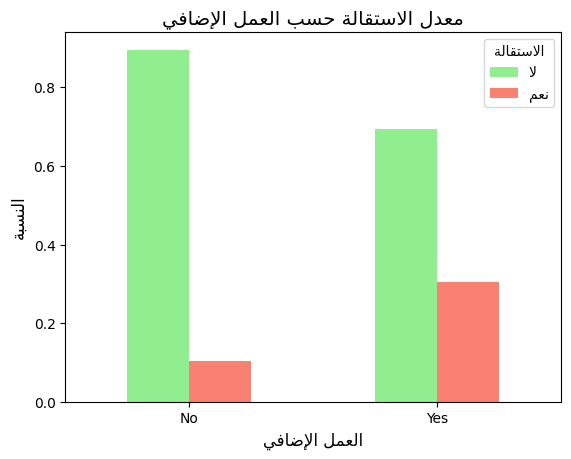

Saved: attrition_overtime_analysis.png


In [10]:
plt.figure(figsize=(10, 6))

overtime_attrition = (
    hr_data.groupby('OverTime')['Attrition']
    .value_counts(normalize=True)
    .unstack()
)

ax = overtime_attrition.plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title(fix_arabic_text('معدل الاستقالة حسب العمل الإضافي'), fontsize=14)
plt.xlabel(fix_arabic_text('العمل الإضافي'), fontsize=12)
plt.ylabel(fix_arabic_text('النسبة'), fontsize=12)
plt.legend([fix_arabic_text('لا'), fix_arabic_text('نعم')], title=fix_arabic_text('الاستقالة'))
plt.xticks(rotation=0)

plt.savefig('attrition_overtime_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print('Saved:', 'attrition_overtime_analysis.png')


## 8) Stacked bar — Gender counts by department (synthetic example)


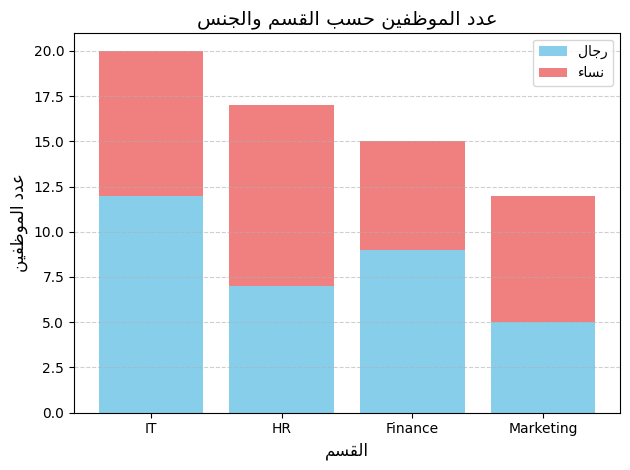

In [11]:
departments = ['IT', 'HR', 'Finance', 'Marketing']
male_counts = [12, 7, 9, 5]
female_counts = [8, 10, 6, 7]

x = np.arange(len(departments))

plt.bar(x, male_counts, label=fix_arabic_text('رجال'), color='skyblue')
plt.bar(x, female_counts, bottom=male_counts, label=fix_arabic_text('نساء'), color='lightcoral')

plt.xlabel(fix_arabic_text('القسم'), fontsize=12)
plt.ylabel(fix_arabic_text('عدد الموظفين'), fontsize=12)
plt.title(fix_arabic_text('عدد الموظفين حسب القسم والجنس'), fontsize=14)
plt.xticks(x, departments)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## 9) Pie chart — Employee distribution by department (synthetic example)


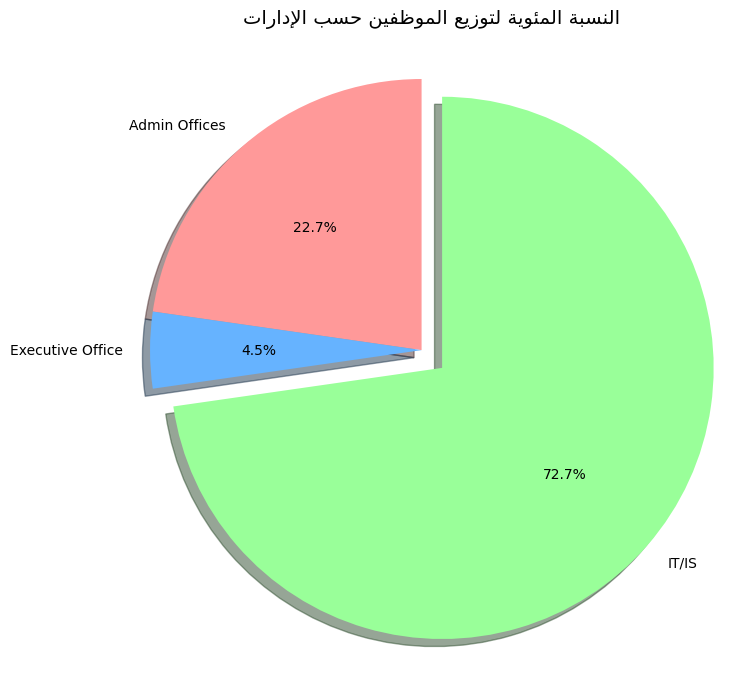

In [12]:
total_employees = sum(employee_counts)
percentages = [(count/total_employees)*100 for count in employee_counts]  # computed for illustration

colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0, 0, 0.1)  # highlight the largest slice

plt.figure(figsize=(8, 8))
plt.pie(
    employee_counts,
    labels=department_names,
    colors=colors,
    autopct='%1.1f%%',
    explode=explode,
    shadow=True,
    startangle=90
)
plt.title(fix_arabic_text('النسبة المئوية لتوزيع الموظفين حسب الإدارات'), fontsize=14, pad=20)
plt.axis('equal')
plt.show()


## 10) Donut chart — Employee distribution by department (synthetic example)


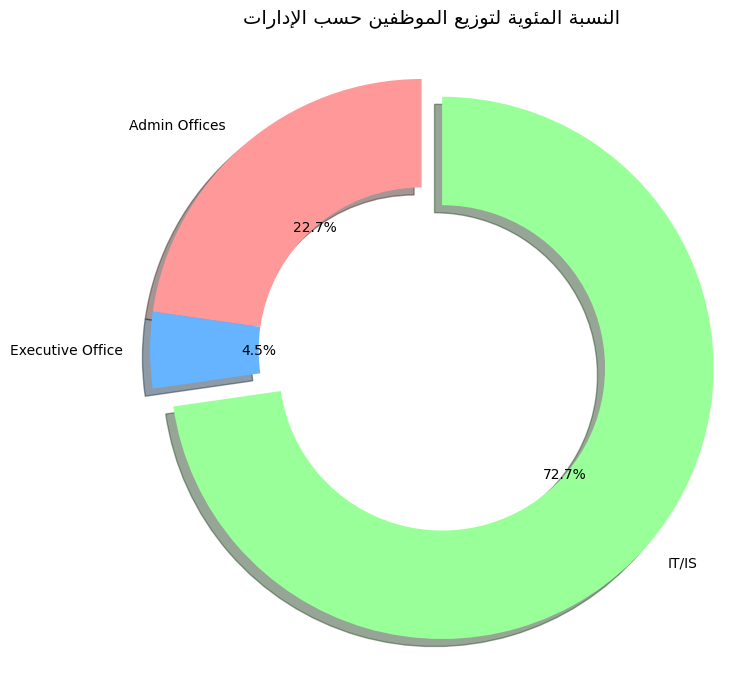

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(
    employee_counts,
    labels=department_names,
    colors=colors,
    autopct='%1.1f%%',
    wedgeprops={'width': 0.4},  # convert pie to donut
    explode=explode,
    shadow=True,
    startangle=90
)
plt.title(fix_arabic_text('النسبة المئوية لتوزيع الموظفين حسب الإدارات'), fontsize=14, pad=20)
plt.axis('equal')
plt.show()


## 11) Scatter plot — Years of experience vs monthly income (synthetic example)


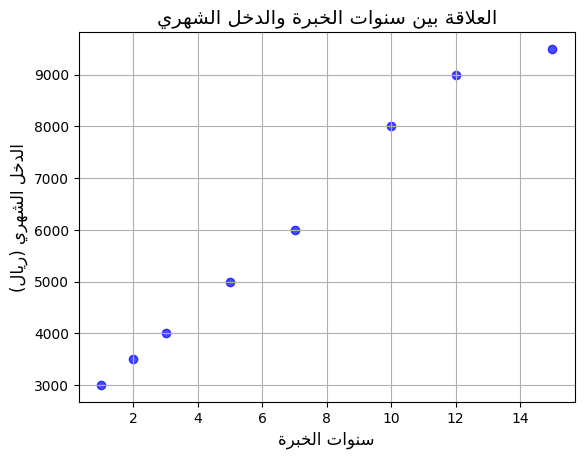

In [14]:
years_experience = [1, 2, 3, 5, 7, 10, 12, 15]
monthly_income = [3000, 3500, 4000, 5000, 6000, 8000, 9000, 9500]

plt.scatter(years_experience, monthly_income, color='blue', alpha=0.7)
plt.title(fix_arabic_text('العلاقة بين سنوات الخبرة والدخل الشهري'), fontsize=14)
plt.xlabel(fix_arabic_text('سنوات الخبرة'), fontsize=12)
plt.ylabel(fix_arabic_text('الدخل الشهري (ريال)'), fontsize=12)
plt.grid(True)
plt.show()


## 12) Box plot — Salary distribution by department (synthetic example)


/tmp/ipython-input-1241070575.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(salaries, labels=departments, patch_artist=True)


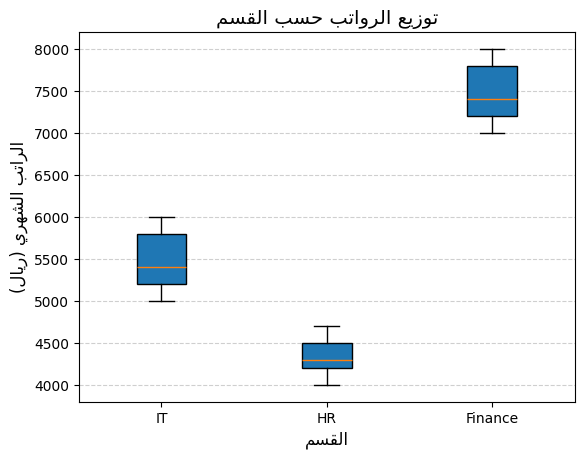

In [15]:
departments = ['IT', 'HR', 'Finance']
salaries = [
    [5000, 5200, 5400, 5800, 6000],
    [4000, 4200, 4300, 4500, 4700],
    [7000, 7200, 7400, 7800, 8000]
]

plt.boxplot(salaries, labels=departments, patch_artist=True)
plt.title(fix_arabic_text('توزيع الرواتب حسب القسم'), fontsize=14)
plt.xlabel(fix_arabic_text('القسم'), fontsize=12)
plt.ylabel(fix_arabic_text('الراتب الشهري (ريال)'), fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


## 13) Subplots — Mini dashboard using the real HR dataset


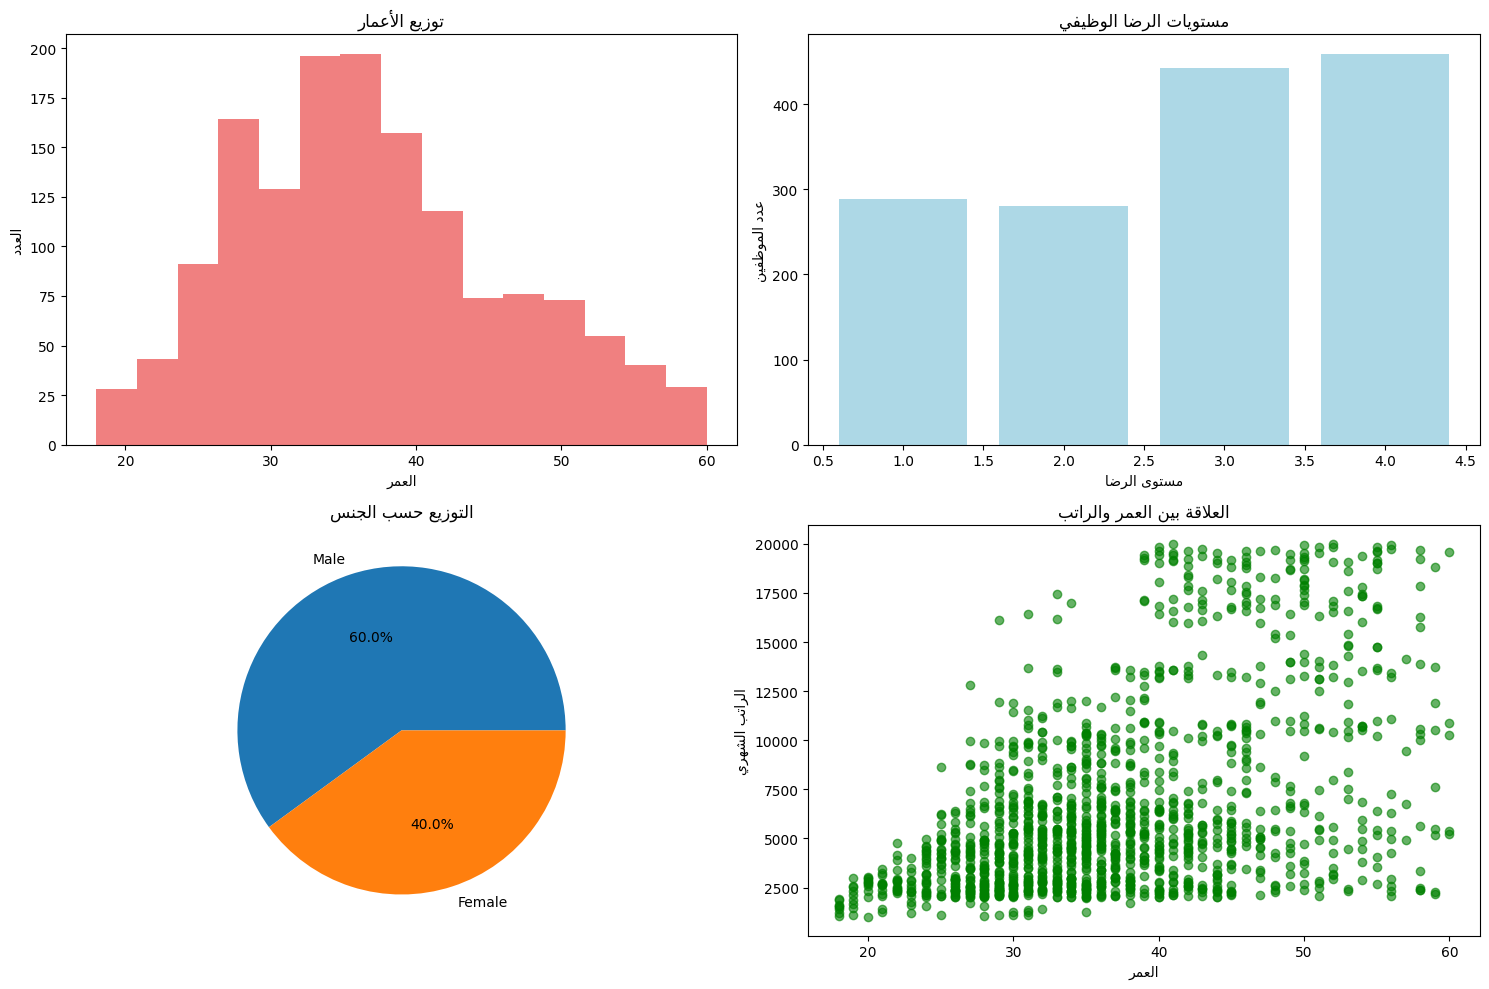

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# (1) Age distribution
axes[0, 0].hist(hr_data['Age'], bins=15, color='lightcoral')
axes[0, 0].set_title(fix_arabic_text('توزيع الأعمار'))
axes[0, 0].set_xlabel(fix_arabic_text('العمر'))
axes[0, 0].set_ylabel(fix_arabic_text('العدد'))

# (2) Job satisfaction counts
job_satisfaction_counts = hr_data['JobSatisfaction'].value_counts().sort_index()
axes[0, 1].bar(job_satisfaction_counts.index, job_satisfaction_counts.values, color='lightblue')
axes[0, 1].set_title(fix_arabic_text('مستويات الرضا الوظيفي'))
axes[0, 1].set_xlabel(fix_arabic_text('مستوى الرضا'))
axes[0, 1].set_ylabel(fix_arabic_text('عدد الموظفين'))

# (3) Gender distribution (requires a Gender column)
gender_counts = hr_data['Gender'].value_counts()
axes[1, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
axes[1, 0].set_title(fix_arabic_text('التوزيع حسب الجنس'))

# (4) Age vs monthly income (requires MonthlyIncome column)
axes[1, 1].scatter(hr_data['Age'], hr_data['MonthlyIncome'], alpha=0.6, color='green')
axes[1, 1].set_title(fix_arabic_text('العلاقة بين العمر والراتب'))
axes[1, 1].set_xlabel(fix_arabic_text('العمر'))
axes[1, 1].set_ylabel(fix_arabic_text('الراتب الشهري'))

plt.tight_layout()
plt.show()
